# Prediccion de casos covid 

En 3 entidades de la republica usando un ANN Backpropagation


In [2]:
library(gifski)
library(tidyverse)
library(gganimate)
library(plotly)
library(RColorBrewer)
library(wesanderson)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




Cargando y limpiando datos

In [3]:
# FUNCIONES para la limpieza de la DB

normalizarfecha <- function(fecha){
    return(str_replace_all(fecha,"X","")  %>% str_replace_all("\\.","/"))
}

cod_Meses <- function(x) {
    labels_meses <- c(
        "Ene","Feb","Mar","Abr","May","Jun",
        "Jul","Ago","Sep","Oct","Nov","Dic")
    return(factor(x,levels = (1:12),labels = labels_meses))
}
    
cod_dias <- function(x) {
    labels_dias <- c("Miercoles","Jueves","Viernes","Sabado","Domingo","Lunes","Martes")
    return(factor(x,levels = (1:7),labels = labels_dias))
}


In [11]:
# Leyendo la base de datos
casos <-  read.csv(file="Casos_Diarios_Estado_Nacional.csv")
casos_diario_list <- gather(casos,key ="dias",value="infectados",4:856)
str(casos_diario_list)
#Normalizando fecha
fecha <-map(casos_diario_list[4],normalizarfecha)
casos_diarios_fecha <- cbind(casos_diario_list[c(TRUE,TRUE,TRUE,FALSE,TRUE)],fecha)

datos <- separate(data=casos_diarios_fecha,
                col=dias,
                into= c("dia","mes","año"),
                sep ='/',
                remove=FALSE)

# Codificando Meses
datos <- datos %>%
    mutate(mes_txt=cod_Meses(as.integer(mes)))%>%
    mutate(consecutivo=1:28149)%>%
     transform(dias = as.Date(dias,"%d/%m/%Y"))

head(datos)

'data.frame':	28149 obs. of  5 variables:
 $ cve_ent   : int  1 2 3 4 7 8 9 5 6 10 ...
 $ poblacion : int  1434635 3634868 804708 1000617 5730367 3801487 9018645 3218720 785153 1868996 ...
 $ nombre    : chr  "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA SUR" "CAMPECHE" ...
 $ dias      : chr  "X26.02.2020" "X26.02.2020" "X26.02.2020" "X26.02.2020" ...
 $ infectados: int  0 0 0 0 0 0 0 0 0 0 ...


,cve_ent,poblacion,nombre,infectados,dias,dia,mes,año,mes_txt,consecutivo
,<int>,<int>,<chr>,<int>,<date>,<chr>,<chr>,<chr>,<fct>,<int>
1,1,1434635,AGUASCALIENTES,0,2020-02-26,26,02,2020,Feb,1
2,2,3634868,BAJA CALIFORNIA,0,2020-02-26,26,02,2020,Feb,2
3,3,804708,BAJA CALIFORNIA SUR,0,2020-02-26,26,02,2020,Feb,3
4,4,1000617,CAMPECHE,0,2020-02-26,26,02,2020,Feb,4
5,7,5730367,CHIAPAS,0,2020-02-26,26,02,2020,Feb,5
6,8,3801487,CHIHUAHUA,0,2020-02-26,26,02,2020,Feb,6


### CLUSTERING DATA
para encontrar entidades semejantes

In [20]:
# Kmeans Clustering :)
casos_diarios_k <- casos[,!(names(casos) %in% c("nombre"))]
resultado <- kmeans(casos_diarios_k,6)
datosK <- cbind(cluster = resultado$cluster,casos)
datosK

cluster,cve_ent,poblacion,nombre,X26.02.2020,X27.02.2020,X28.02.2020,X29.02.2020,X01.03.2020,X02.03.2020,⋯,X18.06.2022,X19.06.2022,X20.06.2022,X21.06.2022,X22.06.2022,X23.06.2022,X24.06.2022,X25.06.2022,X26.06.2022,X27.06.2022
<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,⋯,23,11,162,135,141,162,67,3,1,0
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,⋯,43,33,317,364,307,295,183,19,10,0
5,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,⋯,63,52,366,335,366,348,294,43,49,1
5,4,1000617,CAMPECHE,0,0,0,0,0,0,⋯,22,33,108,95,113,91,83,26,2,0
4,7,5730367,CHIAPAS,0,0,0,1,0,0,⋯,3,7,20,16,11,19,17,0,1,0
2,8,3801487,CHIHUAHUA,0,0,0,0,0,0,⋯,58,45,242,220,227,208,91,4,1,0
4,9,9018645,DISTRITO FEDERAL,0,2,0,0,0,0,⋯,1457,1160,4904,4839,4919,4611,3478,696,474,0
2,5,3218720,COAHUILA,0,0,1,0,0,0,⋯,61,57,266,290,358,325,205,61,43,0
5,6,785153,COLIMA,0,0,0,0,0,0,⋯,24,58,130,147,126,169,61,36,7,0


### PERCEPTRON MULTICAPA

Entidades DURANGO ZACATECAS Y QUERETARO (mismo cluster)

In [68]:
library(neuralnet)
library(NeuralNetTools)


Attaching package: 'neuralnet'


The following object is masked from 'package:dplyr':

    compute




Subsets de datos por entidad

In [78]:
consecutivo <- 1:310
dia_sem <- 1:7
a<-cbind(consecutivo,dia_sem)

#DURANGO DB
datosDgo <- datos[,-10] %>%  #quitamos el consecutivo original de los datos
    filter(año=="2020")%>%
    filter(nombre=="DURANGO")%>%
    mutate(infectadosnew=(infectados/poblacion)*100000)%>%
    cbind(a)%>%
    mutate(dias_txt = cod_dias(as.integer(dia_sem)))
    
# Quitar los dias sabados y domingos 
datosDgo$infectados[(datosDgo$dia_sem %% 4) == 0 ] <- NA
datosDgo$infectados[(datosDgo$dia_sem %% 5) == 0 ] <- NA

datosDgoLV <-datosDgo[complete.cases(datosDgo),] %>%
    mutate(consecutivo=1:222)

#ZACATECAS DB
datosZac<- datos[,-10] %>%
    filter(año=="2020")%>%
    filter(nombre=="ZACATECAS")%>%
    mutate(infectadosnew=(infectados/poblacion)*100000)%>%
    cbind(a)%>%
    mutate(dias_txt = cod_dias(as.integer(dia_sem)))

datosZac$infectados[(datosZac$dia_sem %% 4) == 0 ] <- NA
datosZac$infectados[(datosZac$dia_sem %% 5) == 0 ] <- NA

datosZacLV <-datosZac[complete.cases(datosZac),]%>%
    mutate(consecutivo=1:222)

# QUERETARO DB
datosQro<- datos[,-10] %>%
    filter(año=="2020")%>%
    filter(nombre=="QUERETARO")%>%
    mutate(infectadosnew=(infectados/poblacion)*100000)%>%
    cbind(a)%>%
    mutate(dias_txt = cod_dias(as.integer(dia_sem)))

datosQro$infectados[(datosQro$dia_sem %% 4) == 0 ] <- NA
datosQro$infectados[(datosQro$dia_sem %% 5) == 0 ] <- NA

datosQroLV <-datosQro[complete.cases(datosQro),]%>%
    mutate(consecutivo=1:222)

head(datosDgoLV)
#head(datosZac)
#head(datosQro)

Warning message in cbind(consecutivo, dia_sem):
"number of rows of result is not a multiple of vector length (arg 2)"


,cve_ent,poblacion,nombre,infectados,dias,dia,mes,año,mes_txt,infectadosnew,consecutivo,dia_sem,dias_txt
,<int>,<int>,<chr>,<int>,<date>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<int>,<fct>
1,10,1868996,DURANGO,0,2020-02-26,26,02,2020,Feb,0,1,1,Miercoles
2,10,1868996,DURANGO,0,2020-02-27,27,02,2020,Feb,0,2,2,Jueves
3,10,1868996,DURANGO,0,2020-02-28,28,02,2020,Feb,0,3,3,Viernes
6,10,1868996,DURANGO,0,2020-03-02,02,03,2020,Mar,0,4,6,Lunes
7,10,1868996,DURANGO,0,2020-03-03,03,03,2020,Mar,0,5,7,Martes
8,10,1868996,DURANGO,0,2020-03-04,04,03,2020,Mar,0,6,1,Miercoles


In [84]:
# Normalizacion de los datos

normalizating <- function(data){
    minim <- data %>%
        apply(2,min) #por columnas
    minim[2]<-0

    maxim <- data %>%
        apply(2,max) #por columnas

    NData <- scale(data, center=minim, scale = maxim-minim)
    NormData <- data.frame(NData,minim,maxim)
    return(NormData)
}
NormDgo <-normalizating(select(datosDgoLV,consecutivo, poblacion, infectadosnew))
NormZac <-normalizating(select(datosZacLV,consecutivo, poblacion, infectadosnew))
NormQro <-normalizating(select(datosQroLV,consecutivo, poblacion, infectadosnew))

head(NormDgo)


,consecutivo,poblacion,infectadosnew,minim,maxim
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.000000000,1,0,1,2.220000e+02
2,0.004524887,1,0,0,1.868996e+06
3,0.009049774,1,0,0,2.306051e+01
6,0.013574661,1,0,1,2.220000e+02
7,0.018099548,1,0,0,1.868996e+06
8,0.022624434,1,0,0,2.306051e+01


Diseño del perceptron

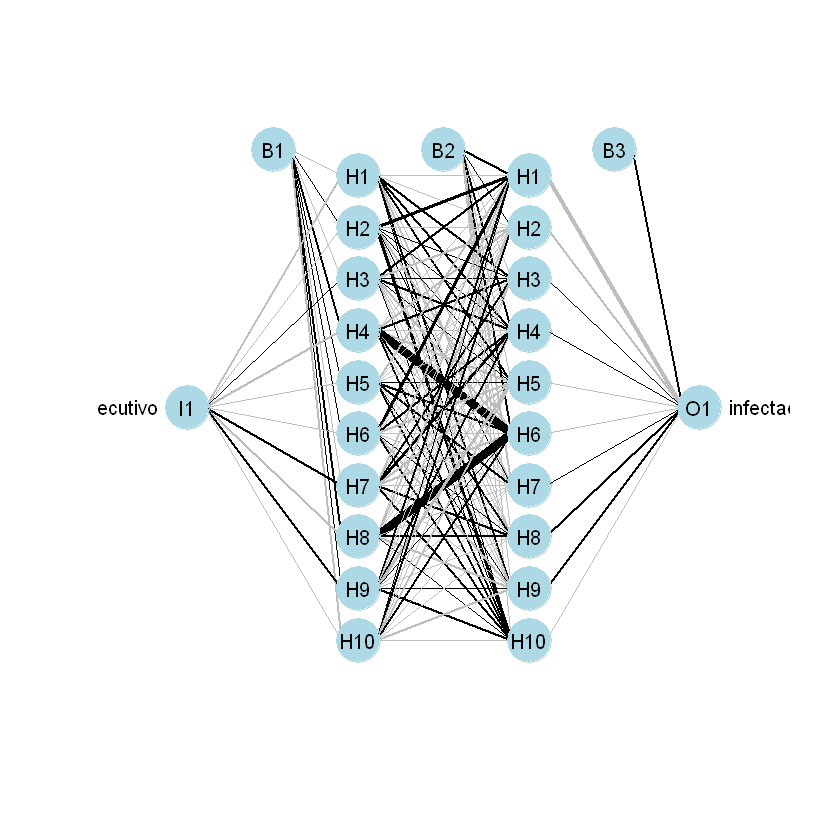

In [85]:
f <- as.formula(infectadosnew ~ consecutivo)

nnet <- neuralnet(f, data=NormDgo,
        hidden = c(10,10),
        threshold = 0.05,
        algorithm = "rprop+",
        stepmax = 10000,
        rep = 1,
        act.fct = "tanh" )

##
plotnet(nnet)

In [86]:
eval_nn <- predict(nnet,NormDgo[,1:2])

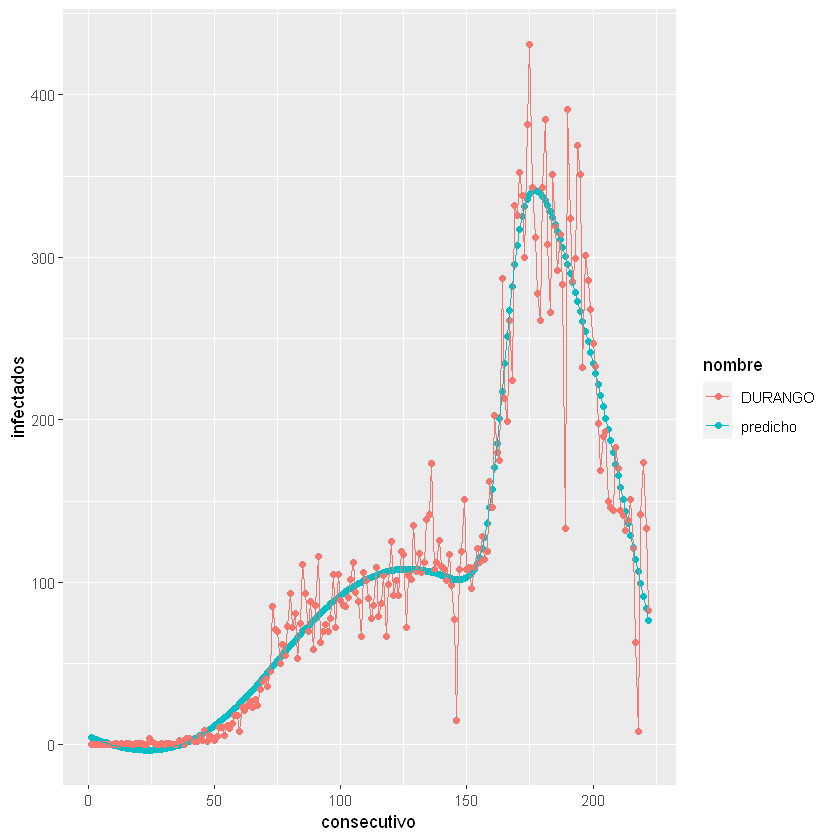

In [88]:
resultado <- data.frame(
    nombre ="predicho",
    consecutivo= 1:222,
    infectados = ( eval_nn * (NormDgo$maxim[3]-NormDgo$minim[3]) + NormDgo$minim[3] )* NormDgo$maxim[2]/100000
)
#resultado

datosDgoLVs <- datosDgoLV %>% select(nombre,consecutivo,infectados)
resultado <- rbind(resultado,datosDgoLVs) # unimos prediccion y datos nacionales en una columna

resultado %>% ggplot(aes(x=consecutivo, y =infectados,group=nombre, color=nombre))+
    geom_point()+ geom_line()

In [89]:
# Bias y varianza

mean(abs(resultado$infectados[1:200] - datosDgoLV$infectados[1:200]))
mean(abs(resultado$infectados[200:220] - datosDgoLV$infectados[200:220]))

[1] 16.04655

[1] 27.78323

Predecir otras entidades con la rede de Durango

[1] 19.02194

[1] 47.28428

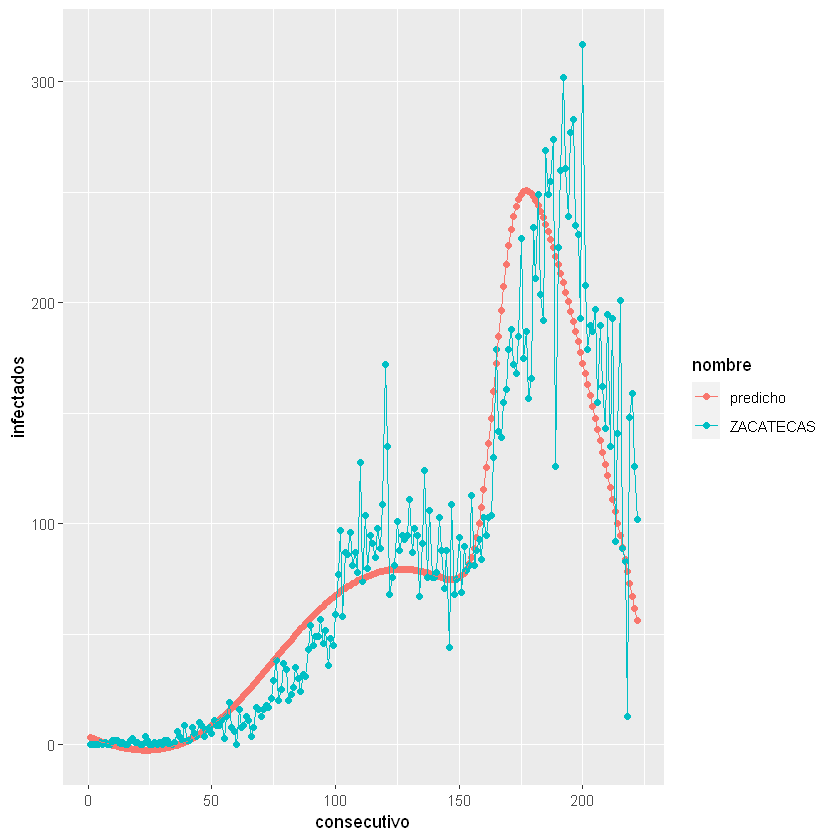

In [91]:
# Ajuste de los datos al modelo
eval_nn <- predict(nnet,NormZac[,1:2])

#resultado
resultado <- data.frame(
    nombre ="predicho",
    consecutivo= 1:222,
    infectados = ( eval_nn * (NormZac$maxim[3]-NormZac$minim[3]) + NormZac$minim[3] )* NormZac$maxim[2]/100000
)

#formato largo
datosZacLVs <- datosZacLV %>% select(nombre,consecutivo,infectados)
resultado <- rbind(resultado,datosZacLVs) # unimos prediccion y datos nacionales en una columna

resultado %>% ggplot(aes(x=consecutivo, y =infectados,group=nombre, color=nombre))+
    geom_point()+ geom_line()

# Bias y varianza

mean(abs(resultado$infectados[1:200] - datosZacLV$infectados[1:200]))
mean(abs(resultado$infectados[200:220] - datosZacLV$infectados[200:220]))

[1] 44.20859

[1] 201.0477

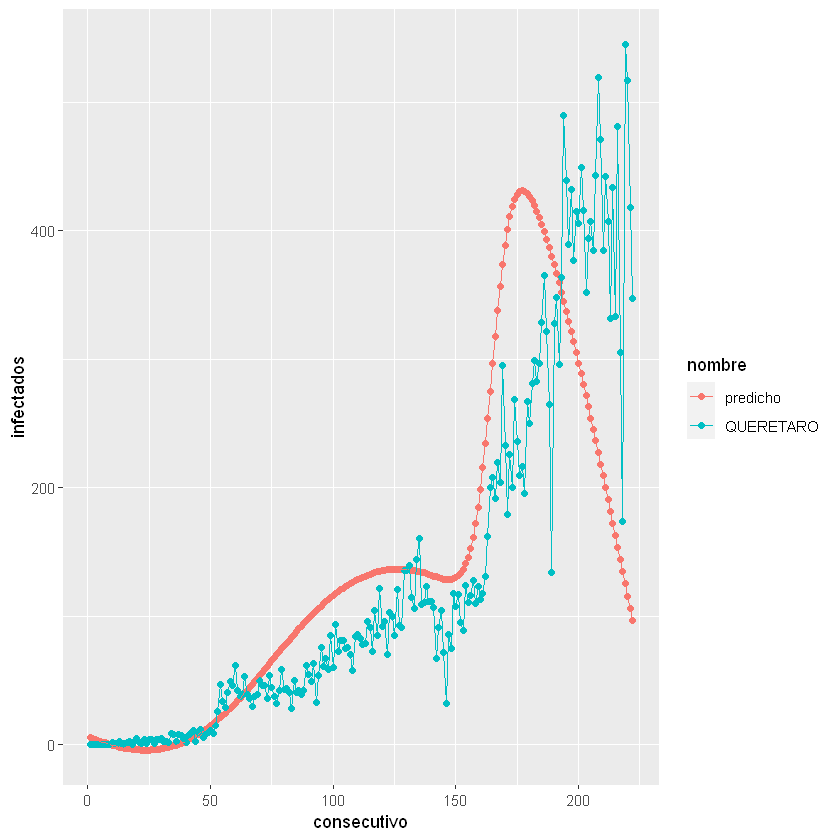

In [93]:
# Ajuste de los datos al modelo
eval_nn <- predict(nnet,NormQro[,1:2])

#resultado
resultado <- data.frame(
    nombre ="predicho",
    consecutivo= 1:222,
    infectados = ( eval_nn * (NormQro$maxim[3]-NormQro$minim[3]) + NormQro$minim[3] )* NormQro$maxim[2]/100000
)

#formato largo
datosQroLVs <- datosQroLV %>% select(nombre,consecutivo,infectados)
resultado <- rbind(resultado,datosQroLVs) # unimos prediccion y datos nacionales en una columna

resultado %>% ggplot(aes(x=consecutivo, y =infectados,group=nombre, color=nombre))+
    geom_point()+ geom_line()

# Bias y varianza

mean(abs(resultado$infectados[1:200] - datosQroLV$infectados[1:200]))
mean(abs(resultado$infectados[200:220] - datosQroLV$infectados[200:220]))